Cook Time for Chicken Egg: 140.50 seconds
Analysis was stable for all advancements!


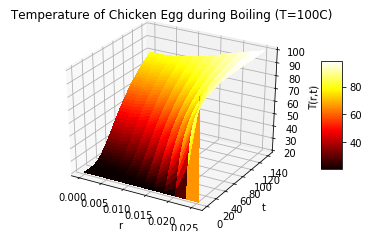

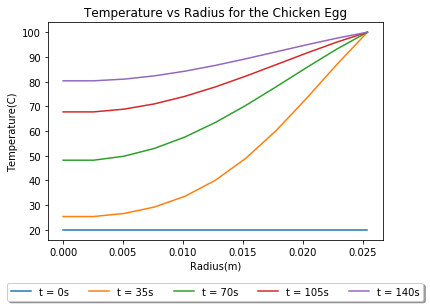

Cook Time for Quail Egg: 48.17 seconds
Analysis was stable for all advancements!


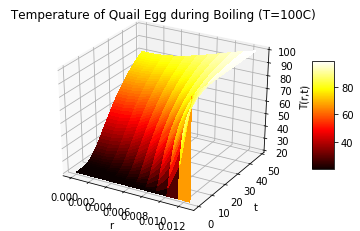

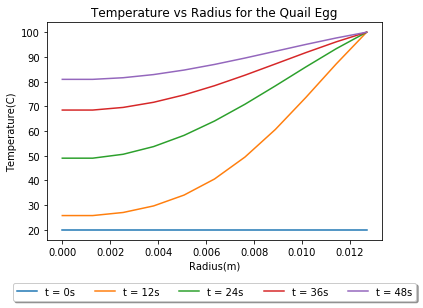

Cook Time for Ostritch Egg: 1062.26 seconds
Analysis was stable for all advancements!


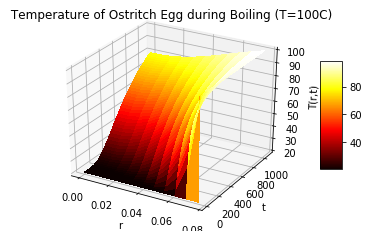

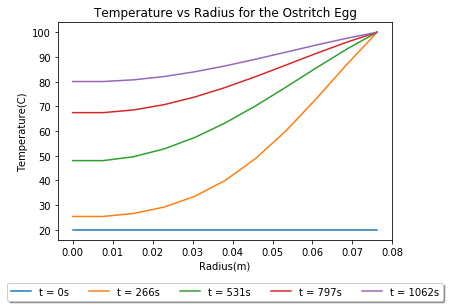

In [4]:
import numpy as np
import matplotlib.pyplot as plt
import random
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib.ticker import LinearLocator

class Egg:

    """
    
    The following class are methods used
    to model the 1-D Heating PDE about its radius.

    T(r,t) - Temperature given radius and time, r<=R and t>=0 

    PDE: dT/dt = α (d^2T/ dr^2)

    """

    def __init__(self, 
                 radius,
                 density,
                 name,
                 K=2.54,
                 Cp=3320,
                 ):
        
        self.R = radius # radius(m)
        self.d = density # density(kg/m^3)
        self.name = name # Type of Egg
        self.K = K # Thermal Conductivity (W/(m*K))
        self.Cp = Cp # Specific Heat (J/(kg*k))
        self.alpha = K / (density*Cp) # m^2/2
        self.cooked_state = 80 #C
        self.overcook_time = 10 #s

        # TBD
        self.T_map = []
        self.dr = 0
        self.dt = 0
        self.cook_time = 0 #s

    def solve(self, dt, dr):
        
        #dt and dr are units of: seconds, meters
        self.dr = dr
        self.dt = dt
        
        r = np.linspace(0, self.R, round(self.R/dr)+1)
        T_cur = np.ones(len(r))
        F = (self.alpha * dt)/(dr*dr)
        time_counter = 0
        is_stable = True
        
        
        #Initial Condition
        T_cur[:] = 20
        
        T_old = T_cur
        self.T_map.append(T_cur.copy())
        
        while(time_counter < self.overcook_time / dt):

            for i in range(1,len(r)-1):
                
                # Explicit Time Advancement
                a = 1-(2*F) - (2*F*self.dr)/(r[i])
                b = (F + (2*F*dr/r[i]))
                c = F

                if(a <= 0):
                    is_stable = False

                T_cur[i] = (a * T_old[i]) + (b * T_old[i+1]) + (c * T_old[i-1]);
                
                # Boundary Conditions
                T_cur[0] = T_cur[1]
                T_cur[-1] = 100
                
                # Increment for when all values are for r are greater than cooked state
                if(all(temp > self.cooked_state for temp in T_cur)):
                    time_counter += 1
                
            T_old = T_cur
            self.T_map.append(T_cur.copy())
            self.cook_time += dt
        
        print("Cook Time for {}: {:.2f} seconds".format(self.name, self.cook_time))
        if is_stable:
            print("Analysis was stable for all advancements!")
        else:
            print("Analysis was not completely stable for all advancements.")
        
    def plot(self):
        
        # SURFACE PLOT
        fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
        r_ = np.linspace(0, self.R, round(self.R/self.dr)+1)
        t_ = np.linspace(0, self.cook_time, round(self.cook_time/self.dt)+1)
        r, t = np.meshgrid(r_ , t_);
        
        surf = ax.plot_surface(r, t, np.array(self.T_map), cmap=cm.hot,
                               linewidth=0, antialiased=False)
        
        fig.colorbar(surf, shrink=0.5, aspect=5)
        ax.set_xlabel('r'); 
        ax.set_ylabel('t'); 
        ax.set_zlabel('T(r,t)')
        ax.set_title(" Temperature of {} during Boiling (T=100C)".format(self.name))
        file_name = 'imgs/{}_3D_plot.jpg'.format(self.name.replace(" ", "_"))
        plt.savefig(file_name, dpi=200)
        #plt.pause(1)
        
        
        # LINE CHART
        plt.figure(random.randint(0,100))

        _ = np.linspace(0, self.cook_time, 5)
        r_ = np.linspace(0, self.R, round(self.R/self.dr)+1)
        sample_values = []
        time_stamps = []
        for t in range(len(_)):
            idx = round(_[t]/self.dt)
            plt.plot(r_, self.T_map[idx], label='t = {}s'.format(round(_[t])))
        lgd = plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.175), fancybox=True, shadow=True, ncol=5)
        plt.title("Temperature vs Radius for the {}".format(self.name))
        plt.xlabel("Radius(m)")
        plt.ylabel("Temperature(C)")
        file_name = 'imgs/{}_2D_plot.jpg'.format(self.name.replace(" ", "_"))
        plt.savefig(file_name, dpi=200, bbox_extra_artists=(lgd,), bbox_inches='tight')
        plt.pause(1)


def main():

    chicken = Egg(radius=0.0254, density=875, name="Chicken Egg")
    chicken.solve(dt=0.1 , dr=0.00254)
    chicken.plot()

    quail = Egg(radius=0.0127, density=1170, name="Quail Egg")
    quail.solve(dt=0.01 , dr=0.00127)
    quail.plot()

    ostritch = Egg(radius=0.0762, density=730, name="Ostritch Egg")
    ostritch.solve(dt=0.01 , dr=0.00762)
    ostritch.plot()

if __name__ == "__main__":
     main()